## Typical Data Analysis Tasks
- Cluster Analysis
- Classification
- Regression
- Time Series Analysis
- Many more! ... statistics, data manipulation, spatial data analysis, deep learning (via Keras integration) etc.

We will look at basic examples in some of these categories. Many more options available - make sure to explore web resources!

### Clustering Analysis
Mainly used for exploratory data mining with applications in several fields such as machine learning, pattern recognition, bioinformatics etc. There are several types of algorithms and some key categories include: Connectivity-based clustering (hierarchical clustering), Centroid-based clustering, Distribution-based clustering, Density-based clustering. We will look at two examples today.

In [1]:
library(ggplot2)

In [2]:
data(iris)

Example of hierarchical clustering

In [3]:
clusters <- hclust(dist(iris[, 3:4]))

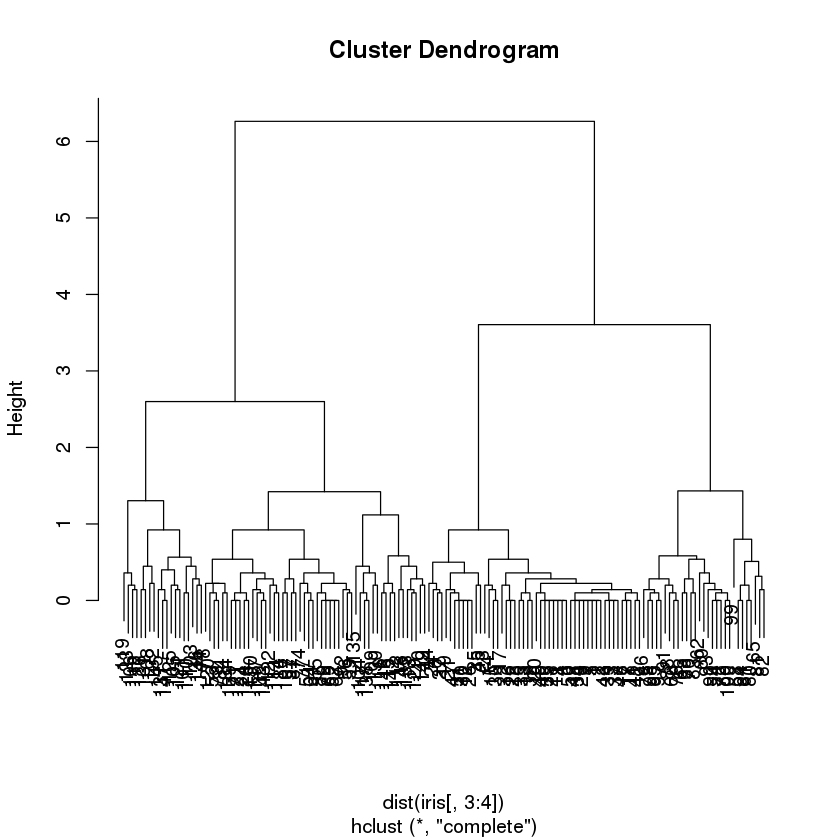

In [4]:
plot(clusters)

In [5]:
clusterCut <- cutree(clusters, 3)

In [6]:
table(clusterCut, iris$Species)

          
clusterCut setosa versicolor virginica
         1     50          0         0
         2      0         21        50
         3      0         29         0

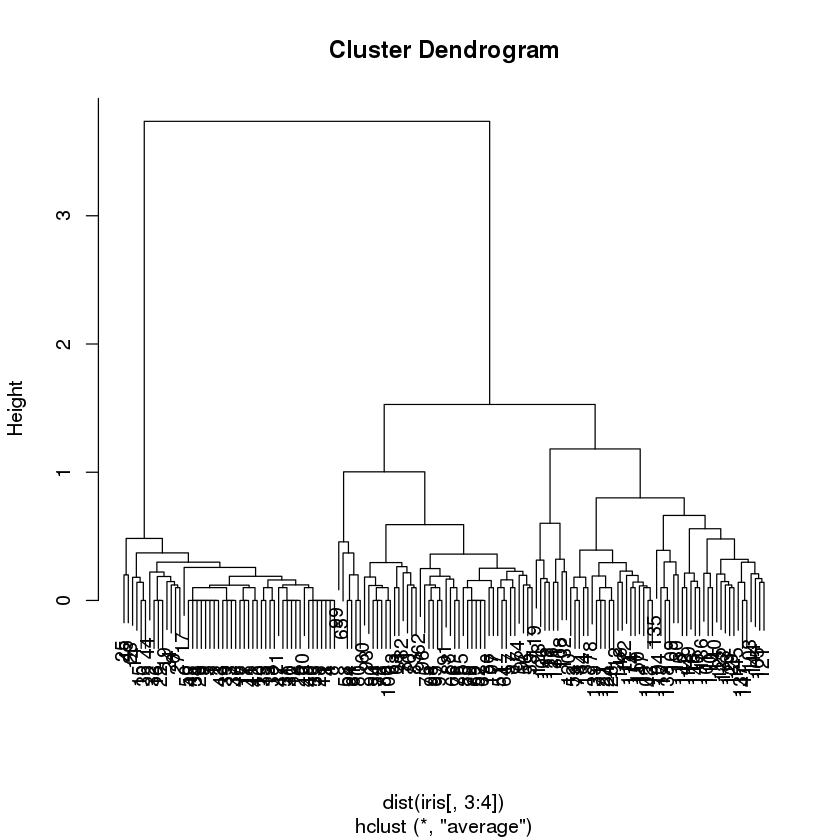

In [7]:
clusters <- hclust(dist(iris[, 3:4]), method = 'average')
plot(clusters)

In [8]:
clusterCut <- cutree(clusters, 3)
table(clusterCut, iris$Species)

          
clusterCut setosa versicolor virginica
         1     50          0         0
         2      0         45         1
         3      0          5        49

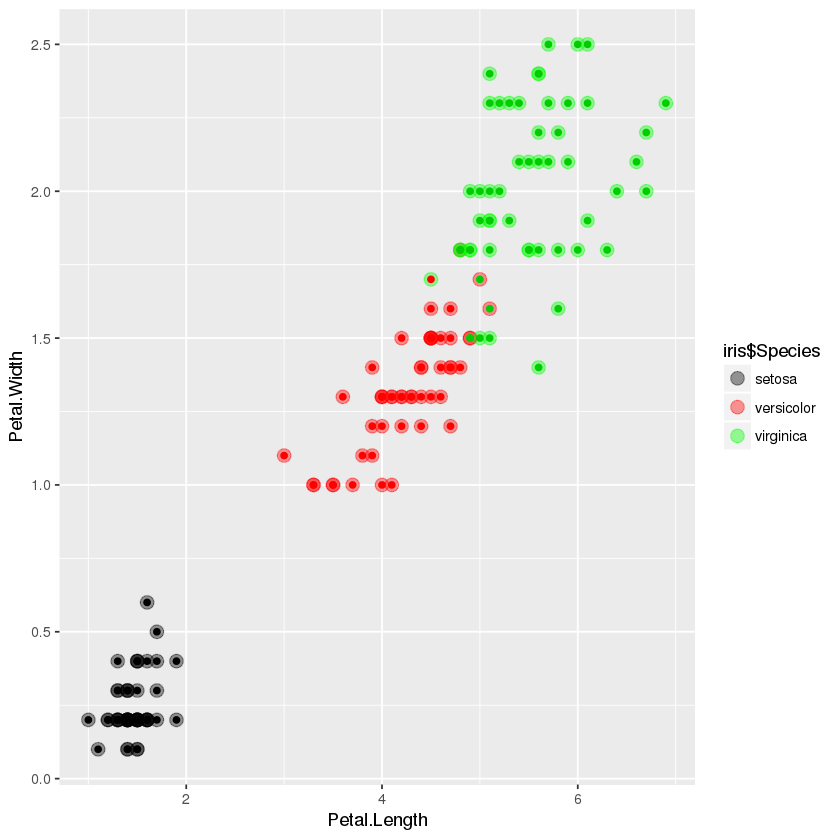

In [9]:
ggplot(iris, aes(Petal.Length, Petal.Width, color = iris$Species)) + 
  geom_point(alpha = 0.4, size = 3.5) + geom_point(col = clusterCut) + 
  scale_color_manual(values = c('black', 'red', 'green'))

Ref: https://www.r-bloggers.com/hierarchical-clustering-in-r-2/

Example of K-Means clustering

In [10]:
set.seed(15)

In [11]:
irisCluster <- kmeans(iris[,1:4],3,nstart=20)

In [12]:
irisCluster

K-means clustering with 3 clusters of sizes 62, 50, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.901613    2.748387     4.393548    1.433871
2     5.006000    3.428000     1.462000    0.246000
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Within cluster sum of squares by cluster:
[1] 39.82097 15.15100 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [13]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0         48        14
  2     50          0         0
  3      0          2        36

In [14]:
irisCluster$cluster <- as.factor(irisCluster$cluster)

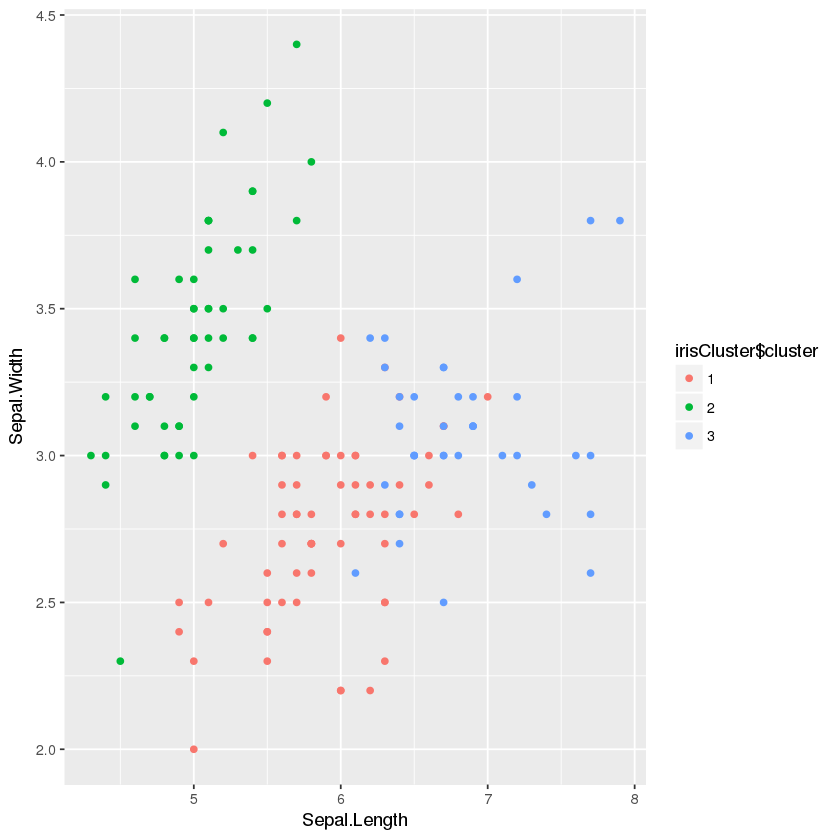

In [15]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = irisCluster$cluster)) + geom_point()

We can experiment a little on which columns of data to use for the K-Means clustering and see if things get better. 

### Classification

Several options are available for classification and prediction functions. Examples include Decision Trees (covered in Bob's talk), Random Forest, Neural Networks, Support Vector Machine (SVM), Bayes Classifiers, and Performance Evaluation.

Random Forest

Decision trees have some drawbacks - they are greedy and make the decision on the curent node which appear to be the best at a time but can't change if thee are new nodes. So overall you might have a less than optimal result. Another big issue is overfitting where the model performs well with the training set but does worse on unseen data. Random Forests take a large collection of individually imperfect models to make a superior ensemble model. This requires a source of randomness to make the trees different from each other:
- Bagging: take randomized sample of the rows from the training set with replacement repeated rows. 
- Take only a subset of available variables (at each and every node). Need to impute missing values.

In [16]:
ind <- sample(2, nrow(iris), replace=TRUE, prob=c(0.7, 0.3))

In [17]:
train.data <- iris[ind==1,]

In [18]:
test.data <- iris[ind==2,]

In [19]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [20]:
rf <- randomForest(Species ~ ., data=train.data, ntree=200,
                   proximity=T)

In [21]:
table(predict(rf), train.data$Species)

            
             setosa versicolor virginica
  setosa         25          0         0
  versicolor      0         35         3
  virginica       0          3        28

In [22]:
print(rf)


Call:
 randomForest(formula = Species ~ ., data = train.data, ntree = 200,      proximity = T) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 6.38%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         25          0         0  0.00000000
versicolor      0         35         3  0.07894737
virginica       0          3        28  0.09677419


Plot the Error Rate

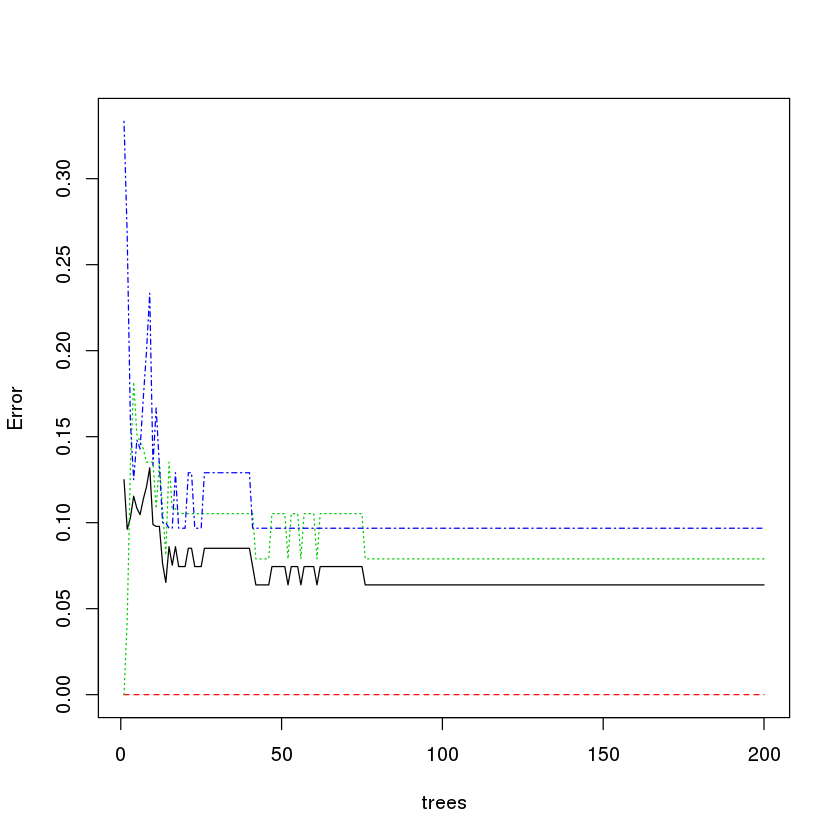

In [23]:
plot(rf, main = "")

In [24]:
importance(rf)

,MeanDecreaseGini
Sepal.Length,4.454367
Sepal.Width,3.242858
Petal.Length,26.071964
Petal.Width,27.123381


Support Vector Machine

Support Vector Machines is a data classification method that separates data using hyperplanes. The idea is to classify the data into two segments by choosing a line that is at the farthest distance from each of the segments. 

In [25]:
library(e1071)

Lets attach the data.frame (to the R search path). This means that the data.frame is searched by R when evaluating a variable, so objects in the database can be accessed by simply giving their names.

In [26]:
attach(iris)

In [27]:
x <- subset(iris, select=-Species)

In [28]:
y <- Species

In [29]:
svm_model <- svm(Species ~ ., data=iris)

In [30]:
summary(svm_model)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [31]:
pred <- predict(svm_model,x)

In [32]:
table(pred,y)

            y
pred         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

Its possible to tune by providing a cost and gamma range. So for example:

In [33]:
svm_tune <- tune(svm, train.x=x, train.y=y, 
              kernel="radial", ranges=list(cost=10^(-1:2), gamma=c(.5,1,2)))

print(svm_tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.04 



In [34]:
svm_model_after_tune <- svm(Species ~ ., data=iris, kernel="radial", cost=1, gamma=0.5)
summary(svm_model_after_tune)


Call:
svm(formula = Species ~ ., data = iris, kernel = "radial", cost = 1, 
    gamma = 0.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  59

 ( 11 23 25 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




### Regression

In [35]:
library("caret")

Loading required package: lattice


mtcars: A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon 

[, 2]	cyl	Number of cylinders

[, 3]	disp	Displacement (cu.in.)

[, 4]	hp	Gross horsepower

[, 5]	drat	Rear axle ratio

[, 6]	wt	Weight (1000 lbs)

[, 7]	qsec	1/4 mile time

[, 8]	vs	V/S

[, 9]	am	Transmission (0 = automatic, 1 = manual)

[,10]	gear	Number of forward gears

[,11]	carb	Number of carburetors

In [36]:
data(mtcars)

In [37]:
mtcarsorig <- mtcars

Split the dataset - lets use 80% of rows for training and the rest for testing

In [38]:
head(mtcarsorig)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [39]:
length(mtcarsorig)

[1] 11

In [40]:
mtcarsorig

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [41]:
tset <- mtcarsorig[1:28,]

In [42]:
testset <- mtcarsorig[29:32,]

In [43]:
testset

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Ford Pantera L,15.8,8,351,264,4.22,3.17,14.5,0,1,5,4
Ferrari Dino,19.7,6,145,175,3.62,2.77,15.5,0,1,5,6
Maserati Bora,15.0,8,301,335,3.54,3.57,14.6,0,1,5,8
Volvo 142E,21.4,4,121,109,4.11,2.78,18.6,1,1,4,2


In [44]:
dim(tset)

[1] 28 11

In [45]:
sapply(tset,class)

mpg       cyl      disp        hp      drat        wt      qsec        vs 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
       am      gear      carb 
"numeric" "numeric" "numeric"

In [46]:
summary(tset)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.2   1st Qu.: 94.5  
 Median :19.20   Median :6.000   Median :196.3   Median :118.0  
 Mean   :20.39   Mean   :6.143   Mean   :230.9   Mean   :136.1  
 3rd Qu.:23.20   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :245.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :15.41   Min.   :0.0000  
 1st Qu.:3.078   1st Qu.:2.429   1st Qu.:17.02   1st Qu.:0.0000  
 Median :3.695   Median :3.438   Median :17.90   Median :0.0000  
 Mean   :3.557   Mean   :3.238   Mean   :18.14   Mean   :0.4643  
 3rd Qu.:3.920   3rd Qu.:3.743   3rd Qu.:19.04   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb     
 Min.   :0.0000   Min.   :3.000   

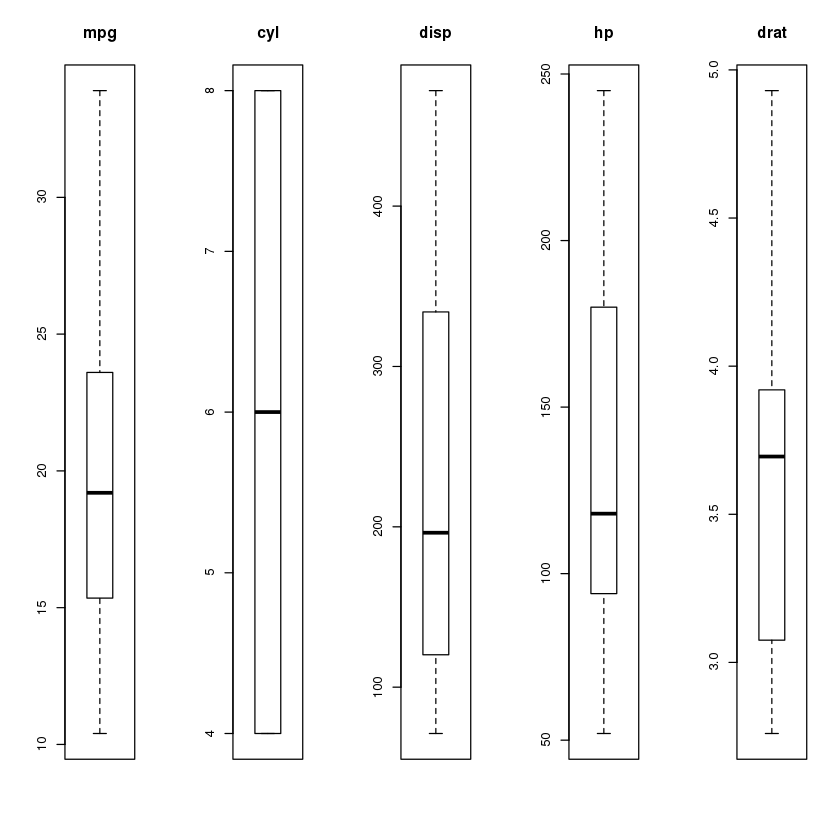

In [47]:
par(mfrow=c(1,5))
  for(i in 1:5) {
  boxplot(tset[,i], main=names(tset)[i])
}

In [48]:
vbles <- colnames(tset)

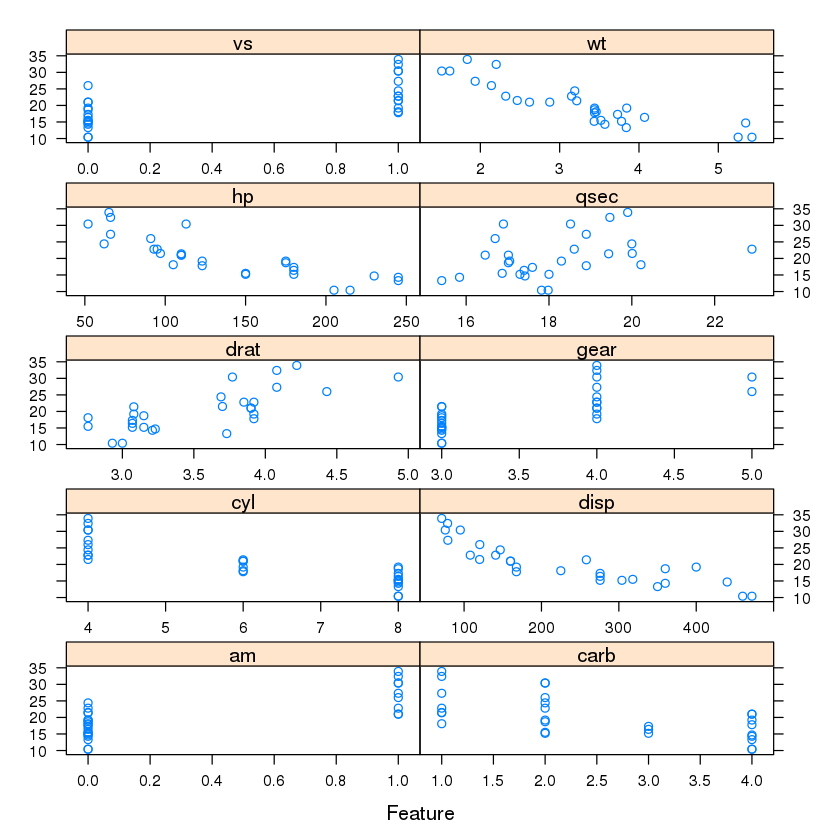

In [49]:
featurePlot (x=tset[,2:11],y=tset[,1],plot="scatter",layout=c(2,5))

In [50]:
lmFit <- train(mpg~., data=tset, method="lm")

In [51]:
summary(lmFit)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7852 -1.4179 -0.1323  1.7316  3.3619 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.462e+01  2.363e+01  -0.618    0.544
cyl          1.151e+00  1.194e+00   0.964    0.349
disp         7.643e-03  1.726e-02   0.443    0.663
hp           2.884e-04  2.569e-02   0.011    0.991
drat         3.161e+00  2.060e+00   1.535    0.143
wt          -2.214e+00  2.033e+00  -1.089    0.291
qsec         8.043e-01  7.782e-01   1.034    0.316
vs           1.944e+00  2.108e+00   0.923    0.369
am           3.657e+00  2.126e+00   1.720    0.104
gear         2.702e+00  1.850e+00   1.461    0.162
carb        -1.666e+00  1.047e+00  -1.591    0.130

Residual standard error: 2.479 on 17 degrees of freedom
Multiple R-squared:  0.903,	Adjusted R-squared:  0.846 
F-statistic: 15.83 on 10 and 17 DF,  p-value: 1.012e-06


### Time Series Analysis

In [52]:
Types of analysis include decomposition, forecasting, clustering, and classification. 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: Types of
          ^


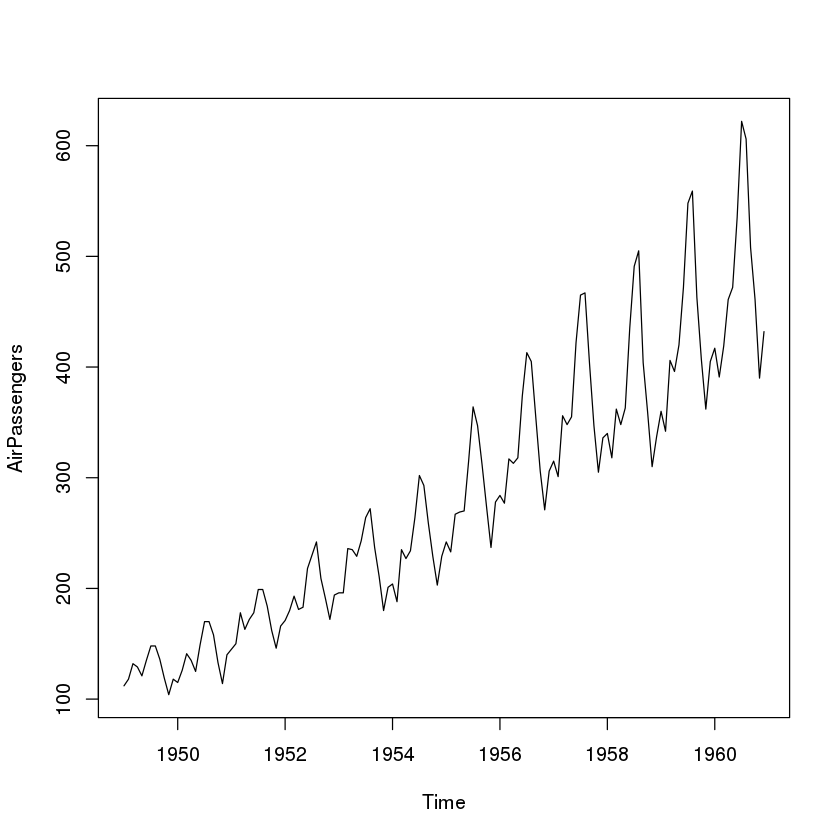

In [53]:
plot(AirPassengers)

Decomposition

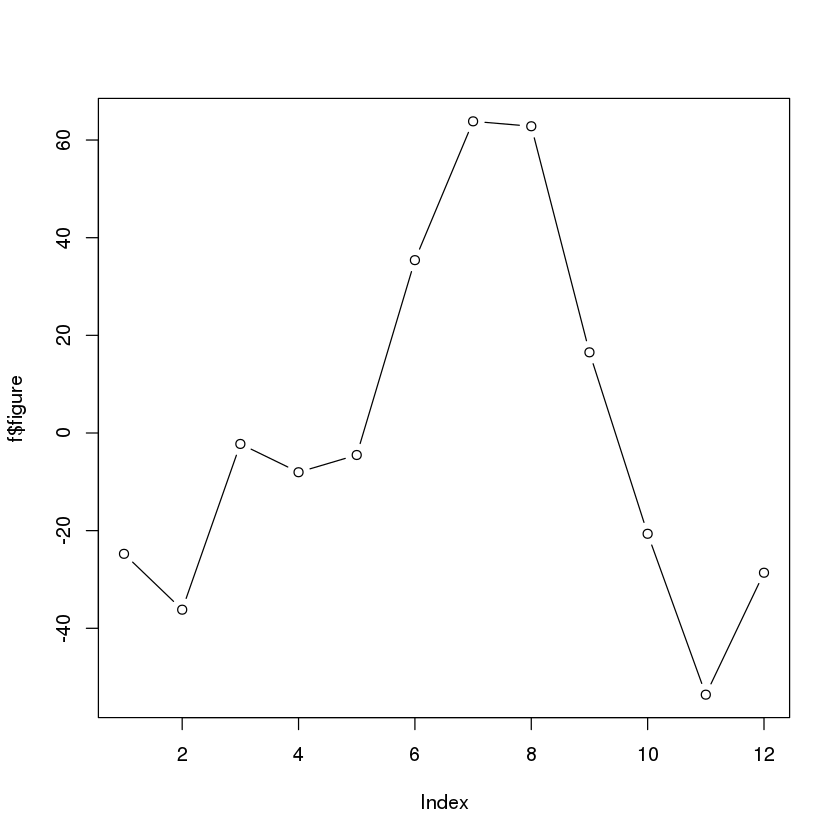

In [54]:
apts <- ts(AirPassengers, frequency = 12)
f <- decompose(apts)
plot(f$figure, type = "b")

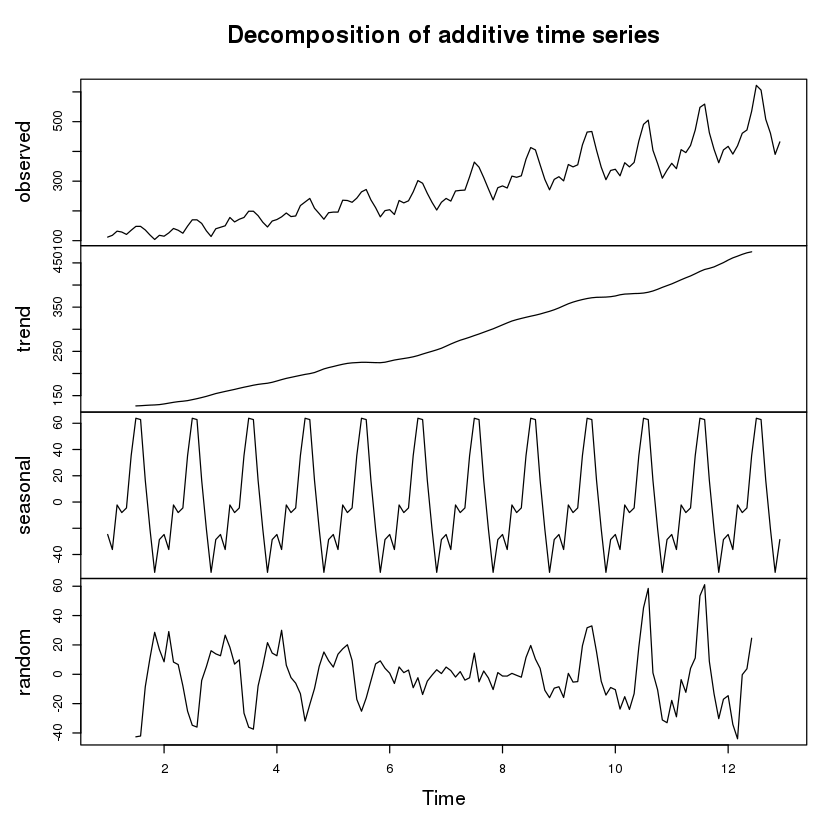

In [55]:
plot(f)

Forecasting: Common models include autoregressive moving average (ARMA), autoregressive integrated moving average (ARIMA)

In [56]:
fit <- arima(AirPassengers, order = c(1, 0, 0), list(order = c(2,
    1, 0), period = 12))
fore <- predict(fit, n.ahead = 24)

In [57]:
U <- fore$pred + 2 * fore$se
L <- fore$pred - 2 * fore$se

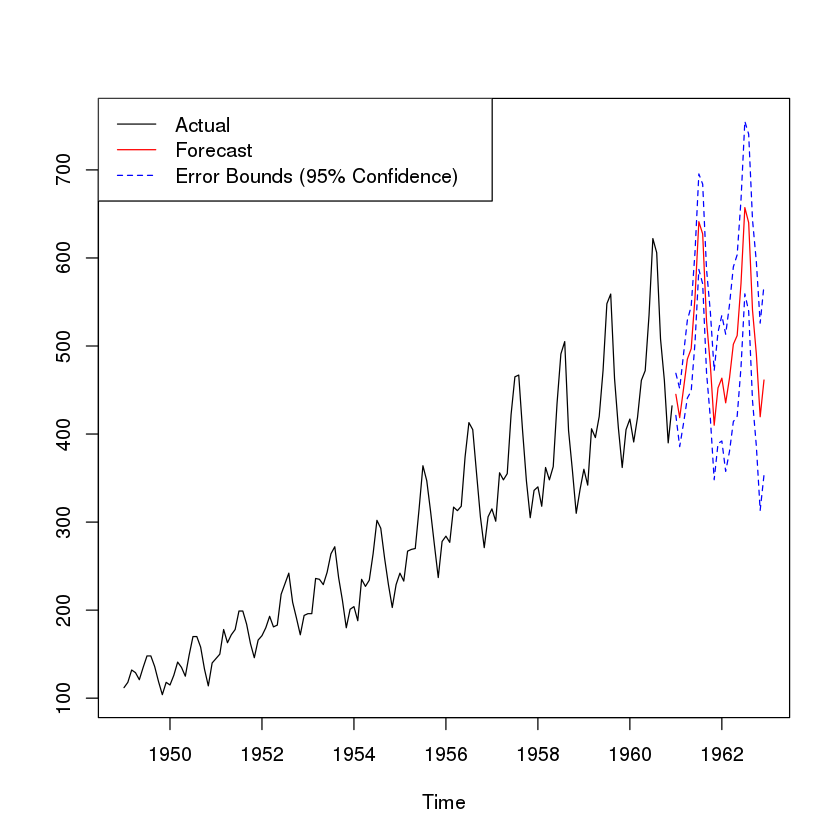

In [58]:
ts.plot(AirPassengers, fore$pred, U, L,
        col = c(1, 2, 4, 4), lty = c(1, 1, 2, 2))
legend("topleft", col = c(1, 2, 4), lty = c(1, 1, 2),
       c("Actual", "Forecast", "Error Bounds (95% Confidence)"))

Reference: http://www.rdatamining.com/docs/time-series-analysis-and-mining-with-r

#### Distance Scaling Example from R-Data mining page

Multidimensional Scaling (MDS) example with R. Automatically determine layout of Australian cities based on distances between them. The layout obtained with MDS is very close to their locations on a map.

Ref: http://www.rdatamining.com/examples/multidimensional-scaling

In [66]:
dist.au <- read.csv("/home/mtatineni/dataset/dist-Aus.csv")

In [67]:
dist.au

X,A,AS,B,D,H,M,P,S
A,0,1328,1600,2616,1161,653,2130,1161
AS,1328,0,1962,1289,2463,1889,1991,2026
B,1600,1962,0,2846,1788,1374,3604,732
D,2616,1289,2846,0,3734,3146,2652,3146
H,1161,2463,1788,3734,0,598,3008,1057
M,653,1889,1374,3146,598,0,2720,713
P,2130,1991,3604,2652,3008,2720,0,3288
S,1161,2026,732,3146,1057,713,3288,0


In [68]:
row.names(dist.au) <- dist.au[, 1]
dist.au <- dist.au[, -1]
dist.au

,A,AS,B,D,H,M,P,S
A,0,1328,1600,2616,1161,653,2130,1161
AS,1328,0,1962,1289,2463,1889,1991,2026
B,1600,1962,0,2846,1788,1374,3604,732
D,2616,1289,2846,0,3734,3146,2652,3146
H,1161,2463,1788,3734,0,598,3008,1057
M,653,1889,1374,3146,598,0,2720,713
P,2130,1991,3604,2652,3008,2720,0,3288
S,1161,2026,732,3146,1057,713,3288,0


Run Multidimensional Scaling (MDS) with function cmdscale(), and get x and y coordinates. k is the maximum dimension of space that the data are to be represented in, and eig indicates whether eigenvalues should be returned.

In [69]:
fit <- cmdscale(dist.au, eig = TRUE, k = 2)
x <- fit$points[, 1]
y <- fit$points[, 2]

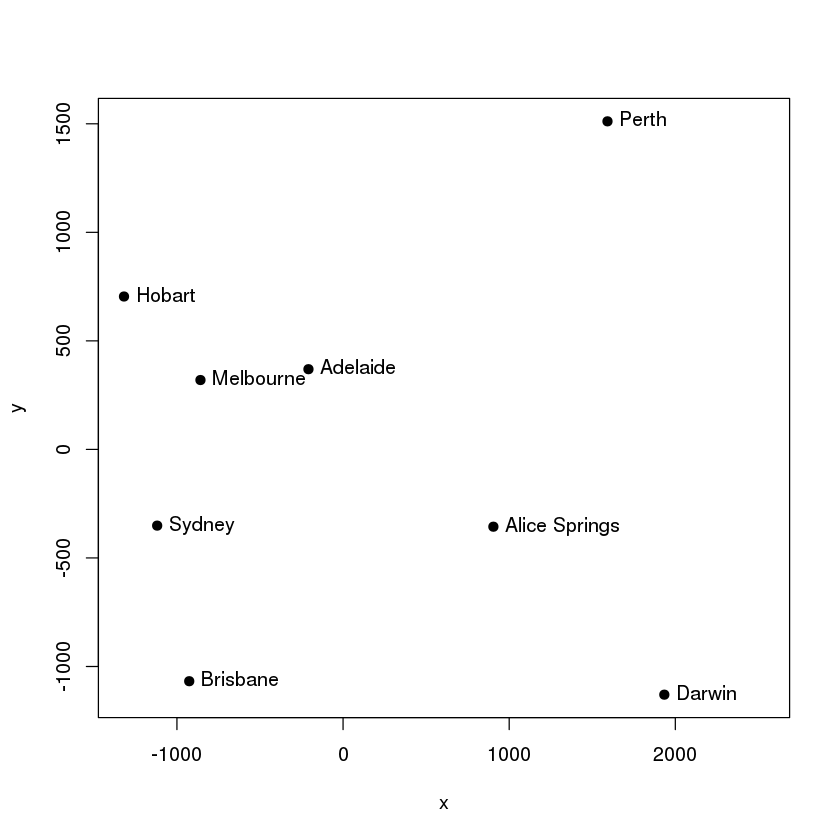

In [70]:
plot(x, y, pch = 19, xlim = range(x) + c(0, 600))
city.names <- c("Adelaide", "Alice Springs", "Brisbane", "Darwin", "Hobart", 
    "Melbourne", "Perth", "Sydney")
text(x, y, pos = 4, labels = city.names)

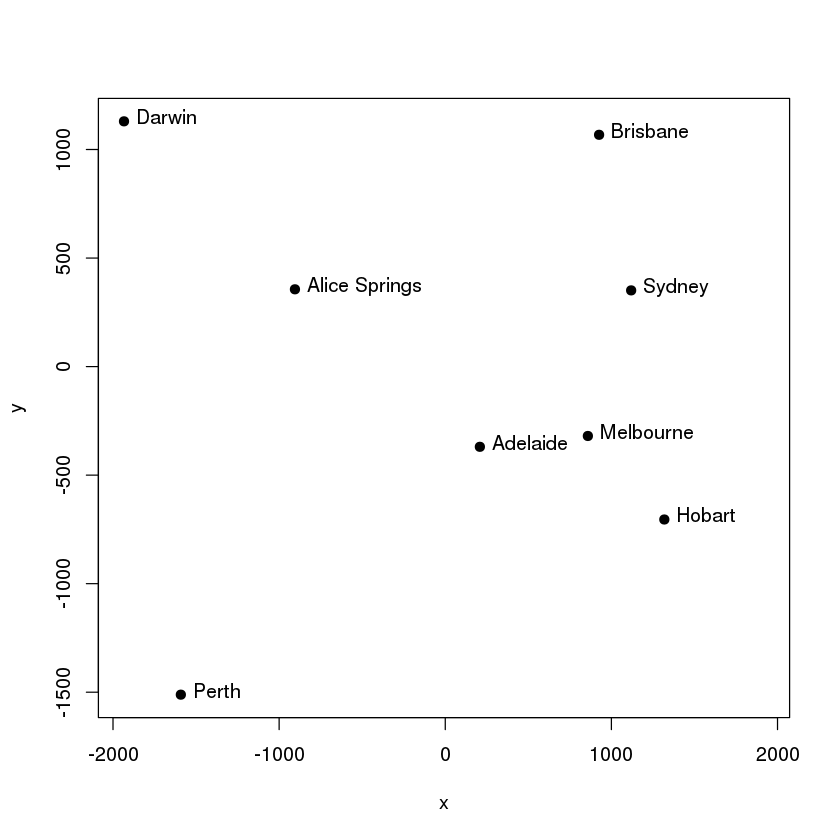

In [71]:
x <- 0 - x
y <- 0 - y
plot(x, y, pch = 19, xlim = range(x) + c(0, 600))
text(x, y, pos = 4, labels = city.names)